In [32]:
# 필요한 라이브러리 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:

df = pd.read_csv('/content/drive/MyDrive/데이터_전처리_파일.csv', encoding='cp949')

In [26]:
#필요한 열 추출
data = df[['Subject','Machinery','Assembly', '청구품목', 'Part No.1', 'Part No.2', 'key2', 'key1', '리드타임_음수제거','견적화폐', '견적단가','D/T','Control No.', '출고선박','출고운반선' ]]
data.head()

,Subject,Machinery,Assembly,청구품목,Part No.1,Part No.2,key2,key1,리드타임_음수제거,견적화폐,견적단가,D/T,Control No.,출고선박,출고운반선
0,NO.1 A/E C18 MAJOR O/H PARTS,NO.1 GENERATOR ENGINE,323-6480 LINES GP-FUEL,SEAL-O-RING-STOR,7.00E-275,0,COOLER,7.00E-275,194,KRW,884530,40,혜인 발주,BLO,본선 선적
1,운전시간 대비 #2 AUX ENG TOP END O/H PARTS,NO.2 GENERATOR ENGINE,GASKET KIT,OIL COOLER & LINES,7.00E-275,0,COOLER,7.00E-275,59,KRW,905260,5,혜인 발주,JBG,본선 선적
2,운전시간 대비 #2 AUX ENG(CAT 3512C) MAJOR O/H PARTS,NO.2 GENERATOR ENGINE,285-8374 MANIFOLD GP-EXH,WASHER,7.00E-275,0,COOLER,7.00E-275,61,KRW,829820,10,0,BON,SANWA FONTAINE
3,#1 AUX ENG TOP END O/H PARTS,NO.1 GENERATOR ENGINE,159-8828 TURBO GP,BOLT-HIGH TEMP,7.00E-275,0,COOLER,7.00E-275,212,KRW,829830,50,혜인 발주,MIR,체항수리 시 사용
4,DEO-E-210512-01,NO.1 GENERATOR ENGINE,2N4727 INSTRUMNT PANEL GP,SEAL,7.00E-275,0,COOLER,7.00E-275,220,KRW,829830,30,0,0,0


In [27]:
# LabelEncoder를 이용해 Object형태의 칼럼을 숫자로 변환
le = LabelEncoder()
data['Subject'] = le.fit_transform(data['Subject'])
data['Machinery'] = le.fit_transform(data['Machinery'])
data['Assembly'] = le.fit_transform(data['Assembly'])
data['청구품목'] = le.fit_transform(data['청구품목'])
data['Part No.1'] = le.fit_transform(data['Part No.1'])
data['Part No.2'] = le.fit_transform(data['Part No.2'])
data['key1'] = le.fit_transform(data['key1'])
data['key2'] = le.fit_transform(data['key2'])
data['리드타임_음수제거'] = le.fit_transform(data['리드타임_음수제거'])
data['견적화폐'] = le.fit_transform(data['견적화폐'])
data['견적단가'] = le.fit_transform(data['견적단가'])
data['D/T'] = le.fit_transform(data['D/T'])
data['Control No.'] = le.fit_transform(data['Control No.'])
data['출고선박'] = le.fit_transform(data['출고선박'])
data['출고운반선'] = le.fit_transform(data['출고운반선'])

<ipython-input-27-2407b7cddf84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Subject'] = le.fit_transform(data['Subject'])
<ipython-input-27-2407b7cddf84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Machinery'] = le.fit_transform(data['Machinery'])
<ipython-input-27-2407b7cddf84>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [33]:
# 맑은 고딕으로 그래프한글설정
mpl.rc('font',family='Malgun Gothic')  

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

## 상관분석

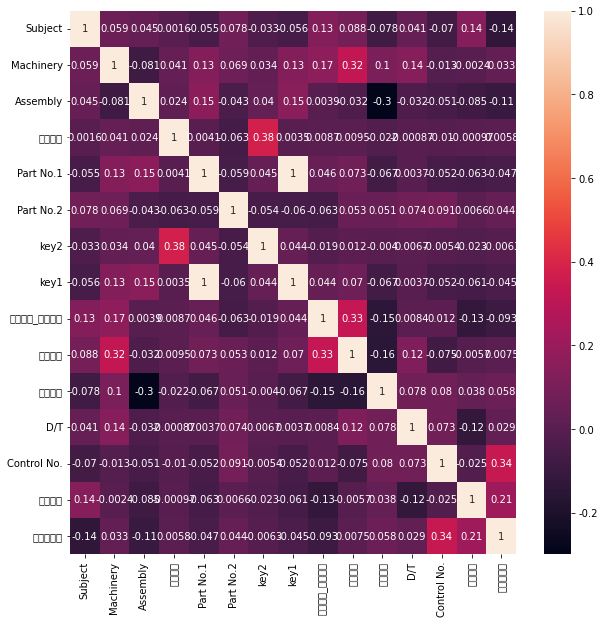

In [34]:
# 상관분석
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

# 상관분석 결과 : 리드타임과 다른 데이터간 상관관계가 없다고 보여짐

## 머신러닝 학습
- 상관관계가 높은 순서대로 변수 삽입
- 견적화폐(0.33), Machinery(0.17), Subject(0.13) 
- Assembly, Control No.가 추가 됐을 때 더 높은 정확도를 가진다.

In [35]:
# 텍스트 데이터
data1 = list(df['견적화폐'] + ' ' + df['Machinery'] + ' ' + df['Subject'] + ' ' + df['출고운반선'] + ' ' + df['Assembly'])
# target 값
target =list(df['리드타임_음수제거'])
# CountVectorizer를 이용하여 feature 벡터 생성
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data1)
# LabelEncoder를 이용하여 target 값을 숫자로 인코딩
le1 = LabelEncoder()
y = le1.fit_transform(target)
# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score # 정확도 함수
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
def print_metrics(y_test, X_test, model) :
  # 테스트 데이터셋으로 예측
  y_pred = model.predict(X_test)

  # 각종 평가지표 계산
  recall = recall_score(y_test, y_pred, average='macro')
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')

  print("Recall: {:.4f}".format(recall))
  print("Accuracy: {:.4f}".format(accuracy))
  print("Precision: {:.4f}".format(precision))
  print("F1-score: {:.4f}".format(f1))

### Random Forest 모델


In [38]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 생성 및 학습
rfc = RandomForestClassifier(n_estimators=7, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
print_metrics(y_test, X_test, rfc)

Recall: 0.8123
Accuracy: 0.9198
Precision: 0.8309
F1-score: 0.8156


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression 모델

In [39]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 생성 및 학습
lr = LogisticRegression(random_state=30, C=8, solver="liblinear", multi_class="ovr", max_iter=100)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print_metrics(y_test, X_test, lr)


Recall: 0.8125
Accuracy: 0.9242
Precision: 0.8312
F1-score: 0.8176


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  Support Vector Machine(SVM) 모델

In [40]:
from sklearn.svm import SVC

# Support Vector Machine(SVM) 모델 생성 및 학습
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

print_metrics(y_test, X_test, svm)


Recall: 0.8107
Accuracy: 0.9271
Precision: 0.8225
F1-score: 0.8135


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# 피클로 모델 저장

import pickle 
with open('model_leadtime.pickle','wb') as fw:
    pickle.dump(rfc, fw)